# Machine Learning for predicting the HR-Employee-Attrition

In [64]:
#data analysis and wrangling
import pandas as pd
import numpy as np

#visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#model developing-machine learning
import sklearn
from scipy.stats import zscore                                                          #for removing the outliers
from sklearn.preprocessing import StandardScaler                                        #for standardizing the input dataset
from sklearn.model_selection import train_test_split                                    #to train the model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score       #for reporting purposes

#boosting techniques
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

#saving the model using joblib
import pickle
#for filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
#acquiring the data
HR_df=pd.read_excel("C:/Users/Subhajit Roy/Desktop/HR-Employee-Attrition.xlsx")

In [7]:
HR_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
#checking the structure of the dataset
HR_df.shape

(1470, 35)

In [9]:
#Information about the whole dataset
HR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
#checking for the statastical report
HR_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


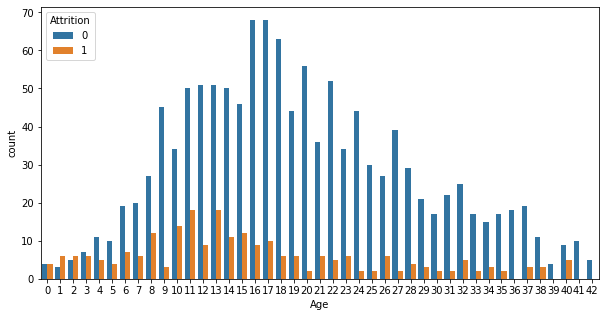

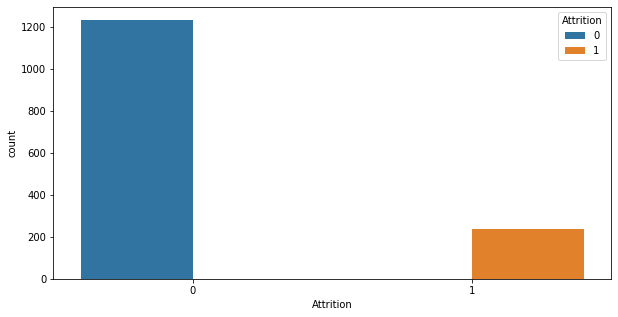

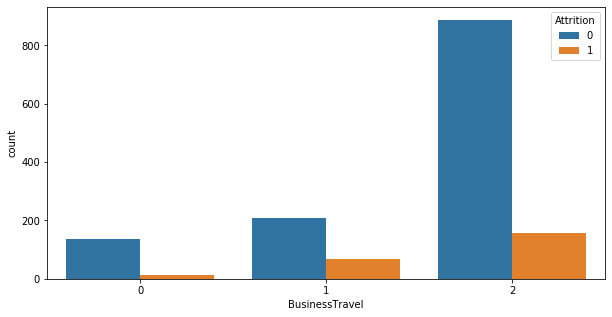

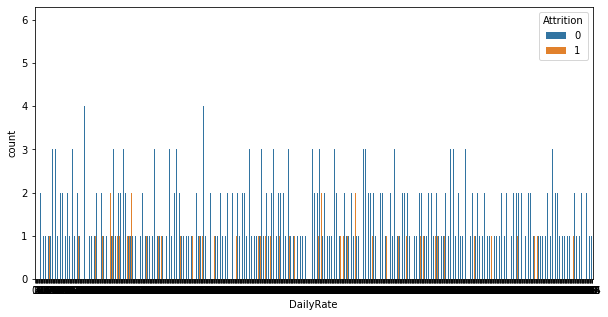

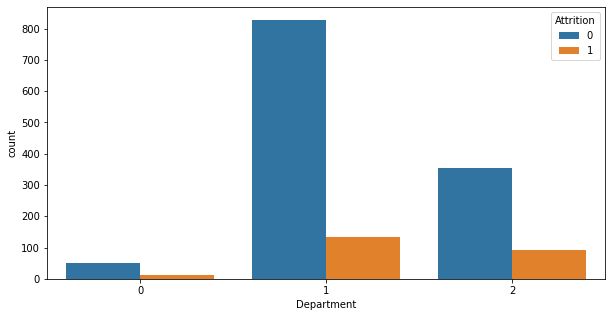

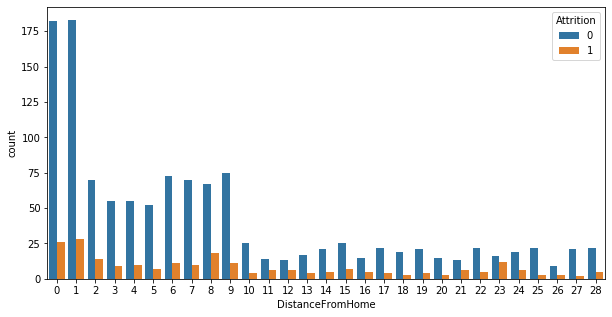

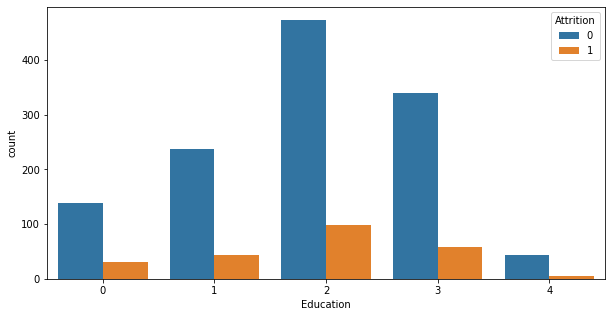

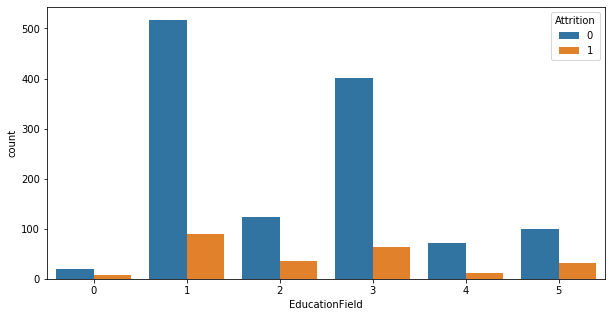

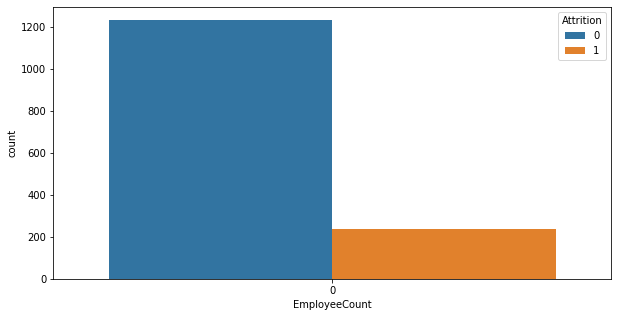

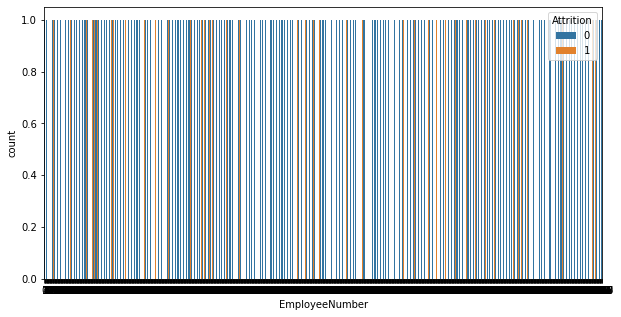

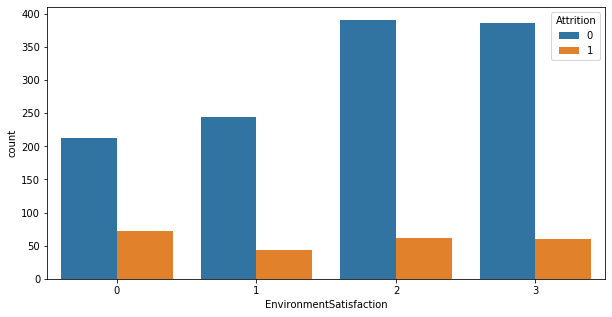

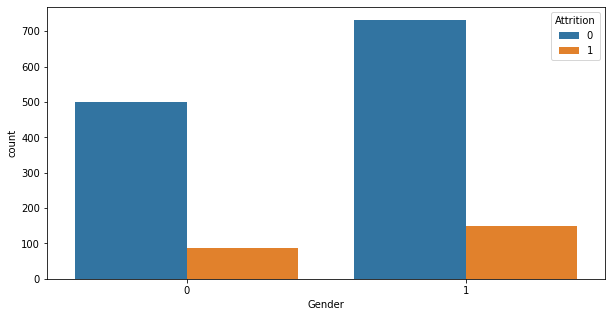

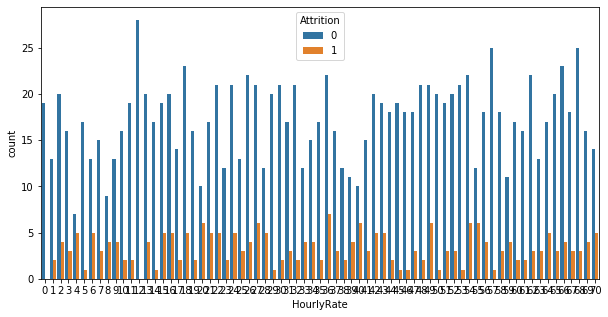

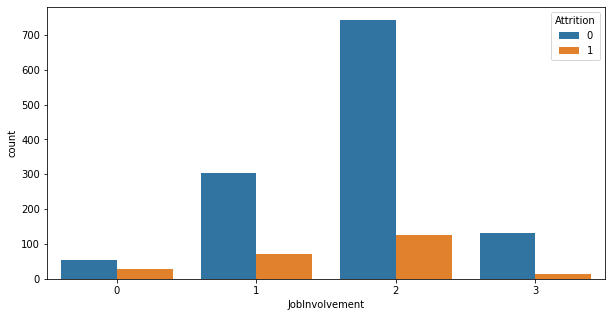

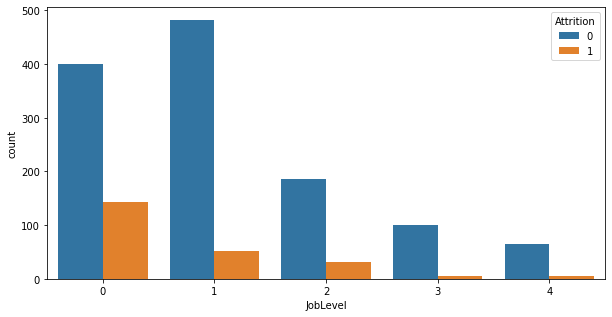

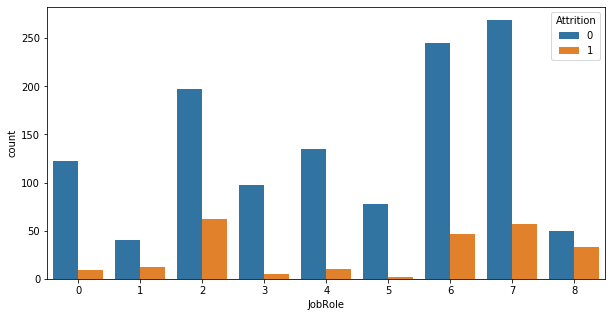

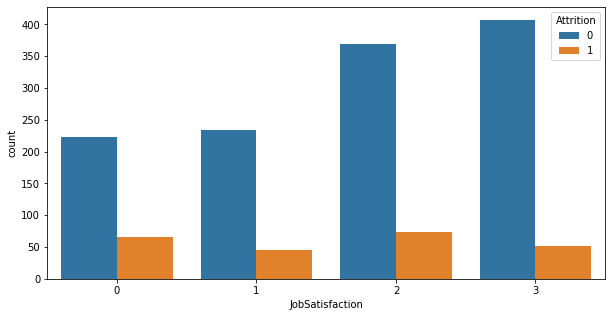

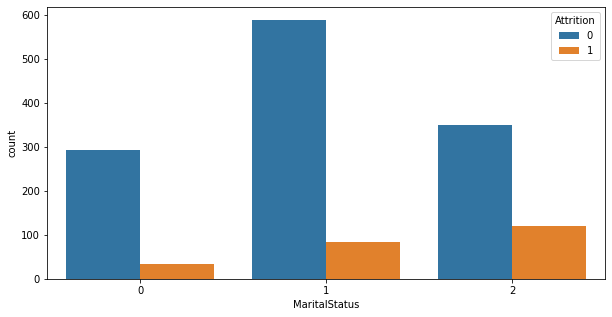

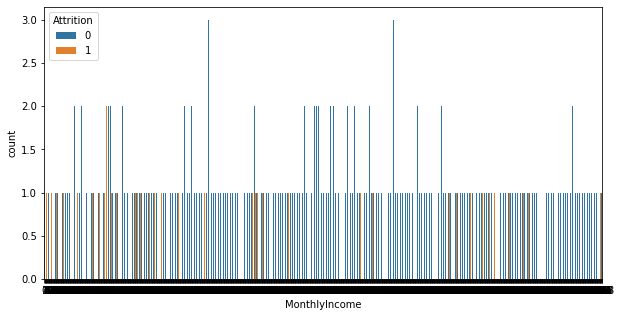

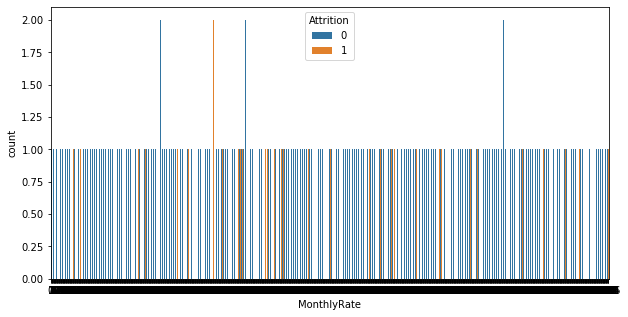

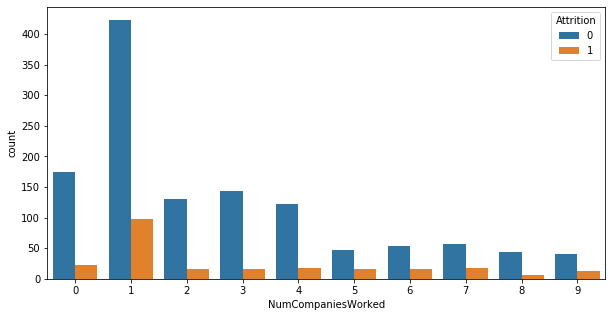

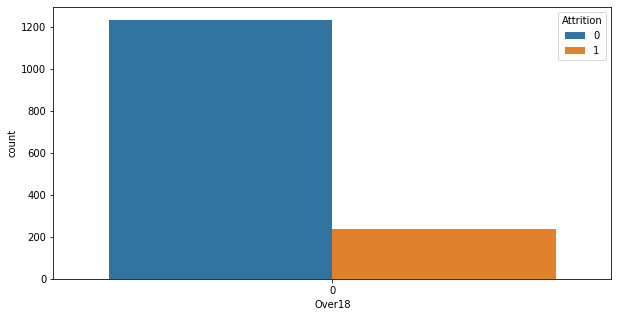

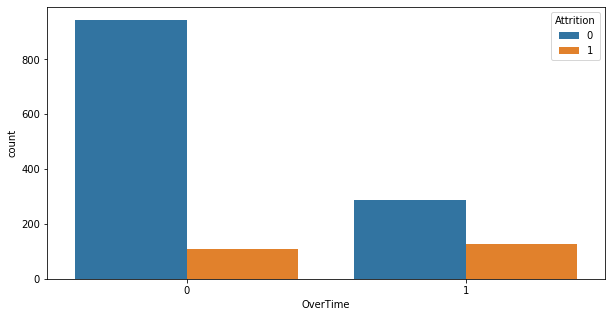

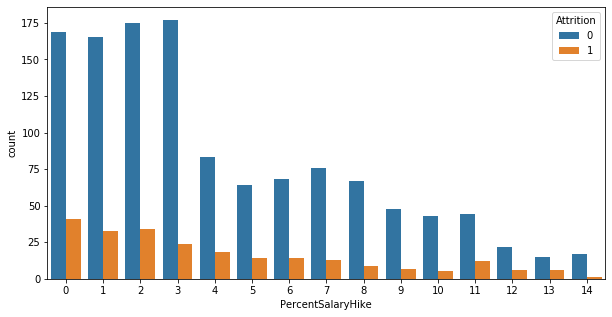

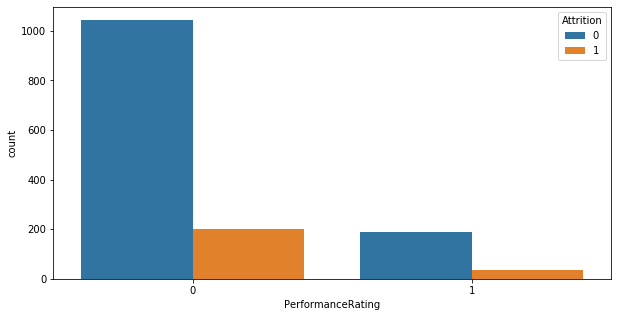

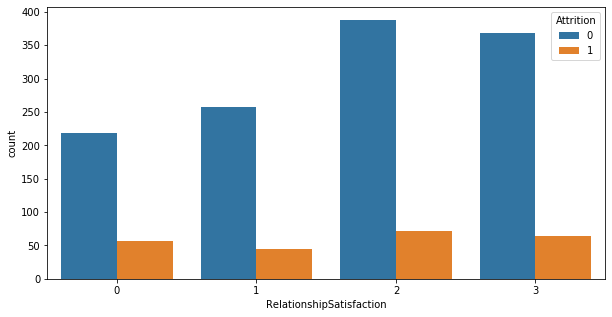

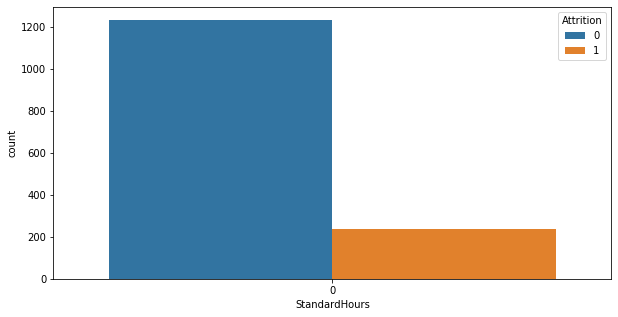

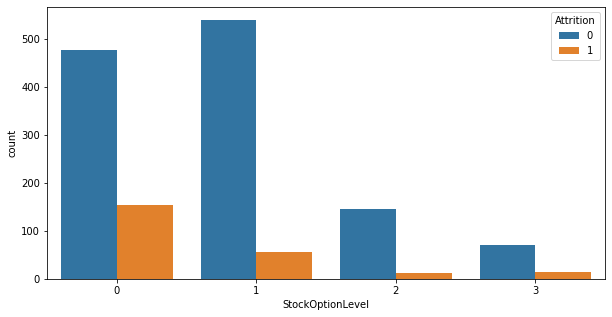

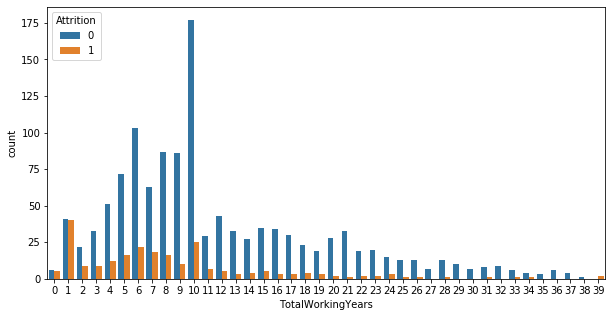

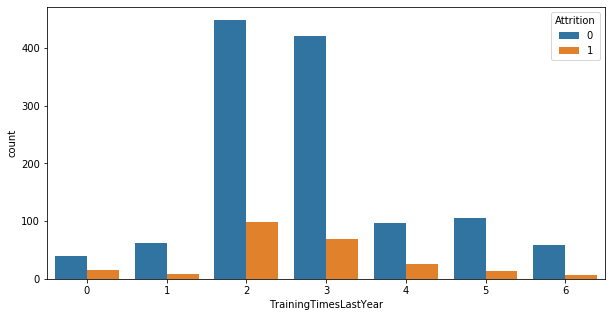

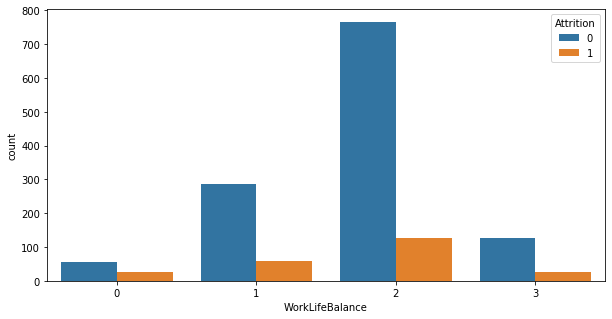

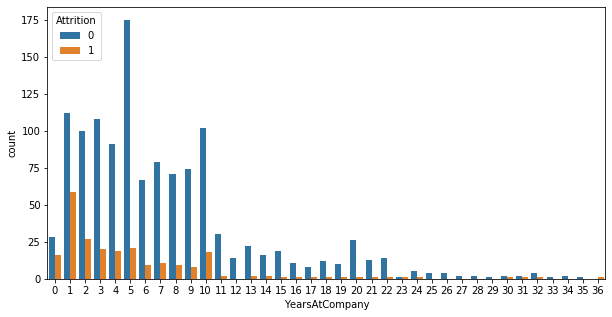

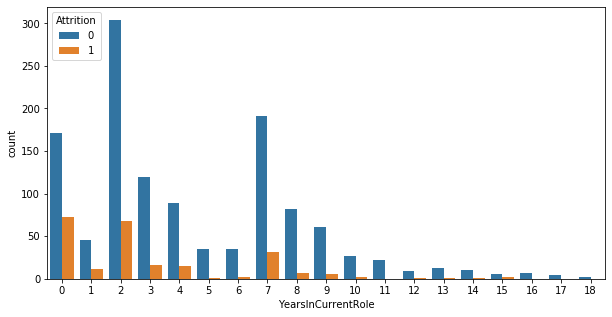

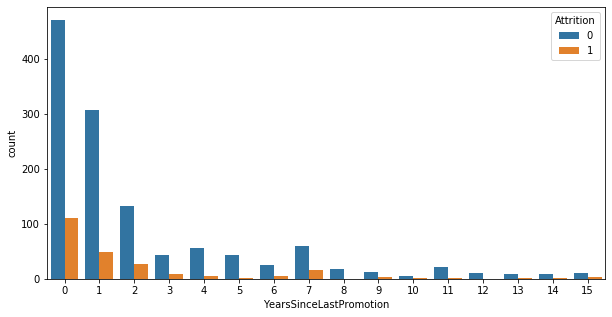

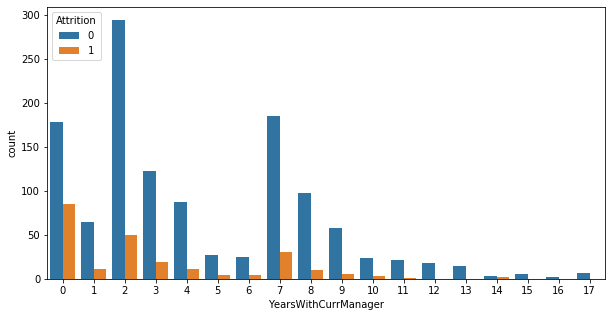

In [63]:
#printing different countplot w.r.t Attrition
data_columns=HR_df.columns
for i in range(len(data_columns)):
    fig,ax=plt.subplots(figsize=(10,5))
    sns.countplot(data=HR_df,x=data_columns[i],hue='Attrition')

In [51]:
#converting sting data to int or float data using label encoder
from sklearn.preprocessing import LabelEncoder
le_x = LabelEncoder() 
for col in HR_df.columns:
    HR_df[col] = le_x.fit_transform(HR_df[col])
HR_df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
294,19,0,1,498,1,8,2,3,0,294,...,2,0,3,4,3,1,4,2,1,2
328,15,0,1,256,2,9,2,2,0,328,...,2,0,0,9,6,1,7,7,0,1
1100,17,0,2,828,2,27,3,1,0,1100,...,0,0,2,6,5,2,5,3,4,2
1194,29,0,2,704,2,1,3,1,0,1194,...,2,0,3,29,2,2,3,2,1,2
983,16,0,2,187,1,1,3,5,0,983,...,3,0,0,14,2,3,14,11,4,11


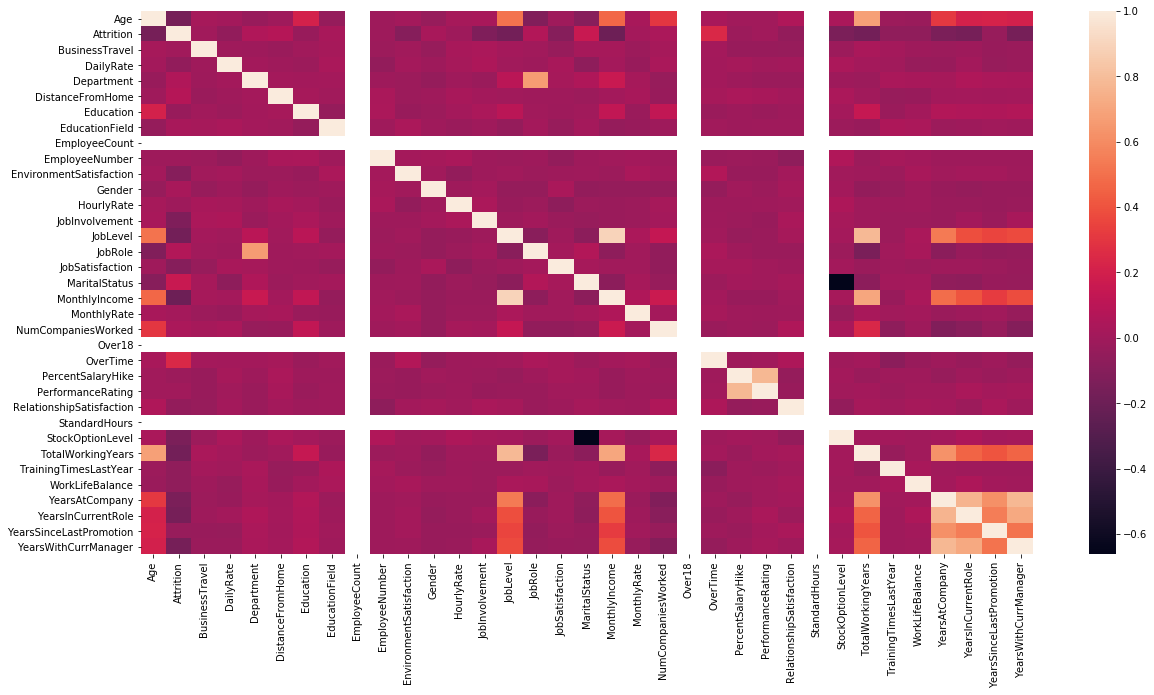

In [53]:
#checking for the correlation
corr_hmap=HR_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_hmap)

Age                            AxesSubplot(0.125,0.826831;0.168478x0.053169)
Attrition                   AxesSubplot(0.327174,0.826831;0.168478x0.053169)
BusinessTravel              AxesSubplot(0.529348,0.826831;0.168478x0.053169)
DailyRate                   AxesSubplot(0.731522,0.826831;0.168478x0.053169)
Department                     AxesSubplot(0.125,0.763028;0.168478x0.053169)
DistanceFromHome            AxesSubplot(0.327174,0.763028;0.168478x0.053169)
Education                   AxesSubplot(0.529348,0.763028;0.168478x0.053169)
EducationField              AxesSubplot(0.731522,0.763028;0.168478x0.053169)
EmployeeCount                  AxesSubplot(0.125,0.699225;0.168478x0.053169)
EmployeeNumber              AxesSubplot(0.327174,0.699225;0.168478x0.053169)
EnvironmentSatisfaction     AxesSubplot(0.529348,0.699225;0.168478x0.053169)
Gender                      AxesSubplot(0.731522,0.699225;0.168478x0.053169)
HourlyRate                     AxesSubplot(0.125,0.635423;0.168478x0.053169)

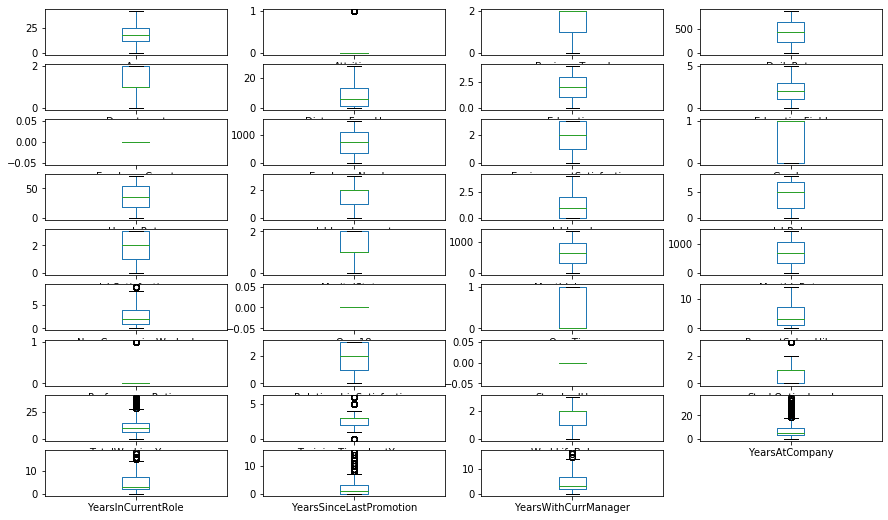

In [54]:
#checking for the outliers
HR_df.plot(kind='box',subplots=True,layout=(12,4),figsize=(15,12))

In [55]:
#checking the skewness before removing the outliers
HR_df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                   0.000930
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.000000
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.060816
MonthlyRate                 0.012315
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

In [56]:
#removing outliers
z_score=np.abs(zscore(HR_df))
print(HR_df.shape)
HR_df_final=HR_df.loc[(z_score<3).all(axis=1)]
print(HR_df_final.shape)

(1470, 35)
(0, 35)


In [57]:
#Now separating input and output variable
#Predicting
x=HR_df.drop(['Attrition'],axis=1)
y=HR_df['Attrition']
print(x.shape)
print(y.shape)

(1470, 34)
(1470,)


In [58]:
#standardizing the input dataset 
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.4463504 ,  0.59004834,  0.71391447, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 1.32236521, -0.91319439, -1.30244563, ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.008343  ,  0.59004834,  1.42812421, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-1.08667552,  0.59004834, -1.59444298, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 1.32236521, -0.91319439,  0.53634851, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.32016256,  0.59004834, -0.42250766, ..., -0.33939374,
        -0.36871529, -0.59522723]])

In [65]:
#Machine Learning Models
models=[]
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', tree.DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC()))

In [76]:
accuracy_results = []
names = []
for name, model in models:
    print(name)
    max_acc_score=0
    for r_state in range(42,80):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.10)
        model_name=model
        model_name.fit(x_train,y_train)
        y_pred=model_name.predict(x_test)
        accuracy_scr=accuracy_score(y_test,y_pred)
        print("random state: ",r_state," accuracy score: ",accuracy_scr)
        if accuracy_scr>max_acc_score:
            max_acc_score=accuracy_scr      
            final_r_state=r_state
    accuracy_results.append(max_acc_score*100)        
    print()
    print("max accuracy score at random state:",final_r_state," for the model ",name," is: ",max_acc_score)
    print()
    print()

LR
random state:  42  accuracy score:  0.8979591836734694
random state:  43  accuracy score:  0.8571428571428571
random state:  44  accuracy score:  0.8639455782312925
random state:  45  accuracy score:  0.8707482993197279
random state:  46  accuracy score:  0.891156462585034
random state:  47  accuracy score:  0.8707482993197279
random state:  48  accuracy score:  0.8571428571428571
random state:  49  accuracy score:  0.8775510204081632
random state:  50  accuracy score:  0.8843537414965986
random state:  51  accuracy score:  0.8639455782312925
random state:  52  accuracy score:  0.8707482993197279
random state:  53  accuracy score:  0.891156462585034
random state:  54  accuracy score:  0.8571428571428571
random state:  55  accuracy score:  0.8775510204081632
random state:  56  accuracy score:  0.8843537414965986
random state:  57  accuracy score:  0.8571428571428571
random state:  58  accuracy score:  0.8435374149659864
random state:  59  accuracy score:  0.9047619047619048
random st

random state:  43  accuracy score:  0.8367346938775511
random state:  44  accuracy score:  0.8639455782312925
random state:  45  accuracy score:  0.8299319727891157
random state:  46  accuracy score:  0.8843537414965986
random state:  47  accuracy score:  0.8639455782312925
random state:  48  accuracy score:  0.8571428571428571
random state:  49  accuracy score:  0.8231292517006803
random state:  50  accuracy score:  0.8639455782312925
random state:  51  accuracy score:  0.8299319727891157
random state:  52  accuracy score:  0.9047619047619048
random state:  53  accuracy score:  0.8843537414965986
random state:  54  accuracy score:  0.8707482993197279
random state:  55  accuracy score:  0.9115646258503401
random state:  56  accuracy score:  0.8707482993197279
random state:  57  accuracy score:  0.8639455782312925
random state:  58  accuracy score:  0.8299319727891157
random state:  59  accuracy score:  0.8979591836734694
random state:  60  accuracy score:  0.8571428571428571
random sta

In [77]:
#cross_val of the models
results = []
names = []
cvs=[]
for name, model in models:
    cv_result=cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")
    results.append(cv_result)
    names.append(name)
    print("Model name: ",name)
    print("Cross Validation Score(Mean): ",cv_result.mean())
    cvs.append(cv_result.mean()*100)
    print("Cross Validation Score(Std): ",cv_result.std())
    print()

Model name:  LR
Cross Validation Score(Mean):  0.8851200686106347
Cross Validation Score(Std):  0.015874948015565354

Model name:  KNN
Cross Validation Score(Mean):  0.851097770154374
Cross Validation Score(Std):  0.005598404032195769

Model name:  DT
Cross Validation Score(Mean):  0.8072384219554032
Cross Validation Score(Std):  0.021969672976049456

Model name:  GNB
Cross Validation Score(Mean):  0.8125157232704403
Cross Validation Score(Std):  0.035710447569732

Model name:  SVC
Cross Validation Score(Mean):  0.8699942824471126
Cross Validation Score(Std):  0.009400548098577875



In [78]:
#checking for the best results
result=pd.DataFrame({'Model':models,'Accuracy_Score':accuracy_results, 'Cross_Validation_Score':cvs})
result

,Model,Accuracy_Score,Cross_Validation_Score
0,"(LR, LogisticRegression(C=1.0, class_weight=No...",90.476190,88.512007
1,"(KNN, KNeighborsClassifier(algorithm='auto', l...",90.476190,85.109777
2,"(DT, DecisionTreeClassifier(ccp_alpha=0.0, cla...",85.714286,80.723842
3,"(GNB, GaussianNB(priors=None, var_smoothing=1e...",85.714286,81.251572
4,"(SVC, SVC(C=1.0, break_ties=False, cache_size=...",91.156463,86.999428


In [82]:
#Choosing the Best Model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=55,test_size=0.10)
model_name=LogisticRegression()
model_name.fit(x_train,y_train)
model_name.score(x_train,y_train)
y_pred_model=model_name.predict(x_test)
accuracy_scr=accuracy_score(y_test,y_pred_model)
cfm=confusion_matrix(y_test,y_pred_model)
cr=classification_report(y_test,y_pred_model)
print("accuracy score: ",accuracy_scr)
print("confusion matrix: ")
print(cfm)
print("classification report: ")
print(cr)
print(y_pred_model)

accuracy score:  0.8775510204081632
confusion matrix: 
[[123   7]
 [ 11   6]]
classification report: 
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       130
           1       0.46      0.35      0.40        17

    accuracy                           0.88       147
   macro avg       0.69      0.65      0.67       147
weighted avg       0.87      0.88      0.87       147

[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [71]:
#saving the model as pickle in a file
pickle.dump(model_name,open('svc_HR_employee_data.pkl','wb'))

In [72]:
#loading the model for testing
loaded_model=pickle.load(open('svc_HR_employee_data.pkl','rb'))
loaded_model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)